In [124]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import sys, inspect
import re
import cv2

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from settings import DATA_PATH

# DATA_PATH = "/home/marta/Documents/PyCharm/memotion-images-analysis/data_20191228/"
sns.set()

In [30]:
def load_file(filename, dir='results/metrics/pics'):
    dataset_path = os.path.join(DATA_PATH, f'{dir}/{filename}')
    with open(dataset_path, "rb") as f:
        df_metrics, df_y, confusion_matrices = pkl.load(f)
    return df_metrics, df_y, confusion_matrices

In [27]:
def bold_max(s):
    values = [False for _ in s.values]
    if s.name != 'Classifier':
        max_val = np.max(s.values)
        values = [True if v == max_val else False for v in s.values]
    return ['font-weight: bold' if v else '' for v in values]

# def highlight_max_acc(s):
#     max_row = np.array(df_metrics['Accuracy'], dtype=np.float32).argmax()
#     return ['background-color: darkseagreen' if i == max_row else '' for i, v in enumerate(s.values)]

def highlight_min_70(s):
    values = [True if v >= 70 else False for v in s.values]
    return ['background-color: orange' if v else '' for v in values]

def highlight_max(s):
    values = [False for _ in s.values]
    if s.name != 'Classifier':
        max_val = np.max(s.values)
        values = [True if v == max_val else False for v in s.values]
    return ['background-color: lightpink' if v else '' for v in values]

def highlight_max_clf(s):
    values = [False for _ in s.values]
    if s.name != 'Classifier':
        max_val = np.max(s.values)
        values = [True if v == max_val else False for v in s.values]
    return ['background-color: plum' if v else '' for v in values]

## Confussion matrix dla przykładowych badań

In [97]:
filename = 'metrics_full_for-scalar_hsv_kmeans_gabor.pickle'
df_metrics, df_y, cms = load_file(filename, dir='results/metrics/memes')

In [98]:
df_y.shape

(363, 6)

In [131]:
def plot_all_cms(cms):
    for cm in cms:
        name = cm[0]
        cm = cm[1]

        labels = ['cartoon', 'painting', 'photo', 'text']
        cm = pd.DataFrame(cm, index=labels, columns=labels).round(decimals=2)
        cm.index.name = 'True labels'
        cm.columns.name = 'Predicted labels'
        fig, ax = plt.subplots(figsize=(7, 6))
        sns.set_context(rc={"font.size":12, "axes.titlesize":15, "axes.labelsize":13})   
        sns.heatmap(cm, cmap="PuRd", annot=True, fmt='', ax=ax)
        ax.set_title("{}\n".format(name))
        plt.show()

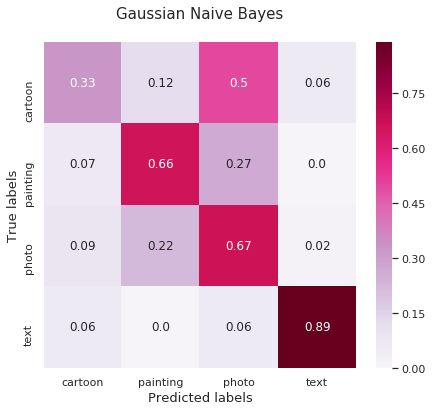

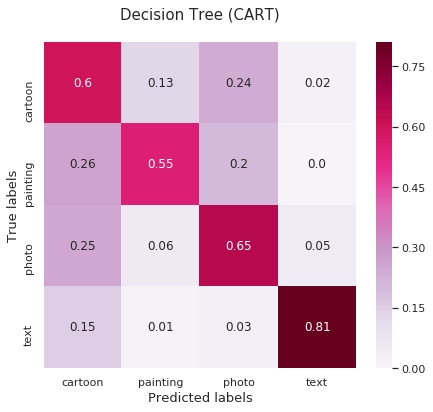

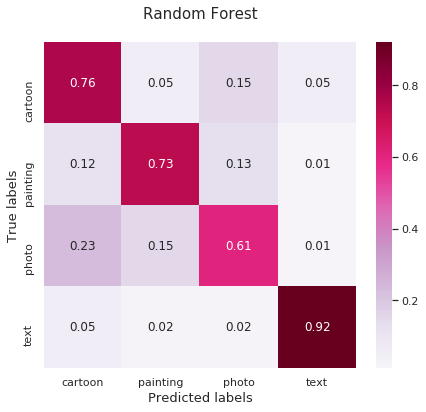

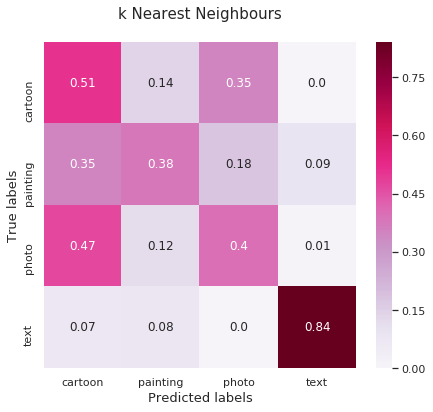

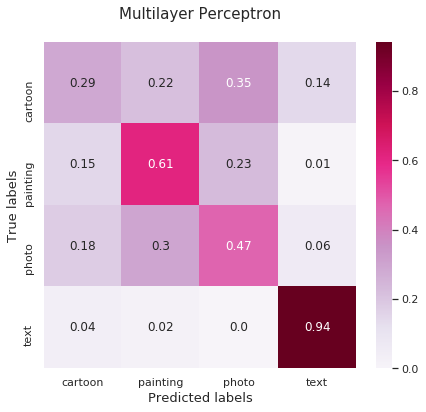

In [132]:
plot_all_cms(cms)

## Wypisanie różnic w klasyfikacji - złych indeksów

In [145]:
pd.set_option('display.max_rows', 150)

In [146]:
def get_differences_for_classifier(df, clf):
    df_filtered = df[['True labels', clf]]
    return df_filtered[df_filtered['True labels'] != df_filtered[clf]]

In [147]:
df_y.columns

Index(['True labels', 'Gaussian Naive Bayes', 'Decision Tree (CART)',
       'Random Forest', 'k Nearest Neighbours', 'Multilayer Perceptron'],
      dtype='object')

In [148]:
get_differences_for_classifier(df_y, 'Random Forest')

,True labels,Random Forest
3,0,2
4,0,2
8,0,1
13,0,2
14,0,2
15,0,2
20,0,2
21,0,2
27,0,3
28,0,3


## Wizualizacja przykładowego zdjęcia 

In [126]:
def load_image_by_cv2(file_path):
    path = os.path.join(DATA_PATH, file_path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_image(image):
    h, w, _ = image.shape
    plt.figure(figsize=(int(w/100), int(h/100)))
    plt.axis("off")
    plt.imshow(image)
    plt.show()

In [121]:
def create_feature_from_dir(src_path: str, im_type: str, verbose=True):
    labels = os.listdir(src_path)
    labels.sort()
    features = list()
    
    idx = 0
    file_name_list = []
    for i in range(len(labels)):
        label = labels[i]
        if verbose:
            print("\nLabel: {}".format(label))
        label_path = os.path.join(src_path, label)
        label_path = os.path.join(label_path, im_type)
        files = os.listdir(label_path)
        files.sort()
        for file_name in files:
            file_path = os.path.join(label_path, file_name)
            if verbose:
                print(idx, file_name)
            idx += 1
            file_name_list.append(file_path)
    return file_name_list

In [122]:
file_names = create_feature_from_dir(os.path.join(DATA_PATH, 'base_dataset'), 'pics', verbose=False)

In [168]:
# 47	0	2
# 58	0	2
# 66	0	2
# 70	0	2

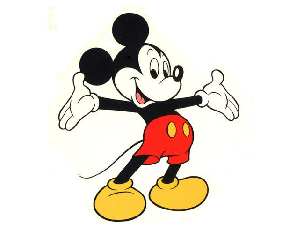

In [167]:
img = load_image_by_cv2(file_names[13])
plot_image(img)

## Analiza wszystkich wyników

In [20]:
feature_count_19 = [3, 1, 1, 1, 8, 32, 478, 18, 400, 60, 5, 5, 11, 489, 499, 43, 521, 531, 53]
feature_count_14 = [3, 8, 32, 478, 18, 400, 60, 11, 43, 489, 521, 509, 541, 53]

In [23]:
def create_table(path, feature_count):
    filenames = glob.glob(f'{DATA_PATH}/{path}/*')
    filenames[:] = [filename for filename in filenames if re.search('pca', filename) is None]
    filenames[:] = [filename for filename in filenames if filename[-8] != "3"]
    filenames[:] = [filename for filename in filenames if re.search('\d{3}', filename[-10:-7]) is None]
    filenames = sorted(filenames)
    
    metrics, metric_names = [], []
    for filename in filenames:
        df_metrics, df_y, confusion_matrices = load_file(filename.split('/')[-1], dir=path)
        metrics.append(df_metrics)
        metric_names.append(filename.split('/')[-1][17:-7])

    metric_names = [mn.replace('_', ' ') for mn in metric_names]
    
    acc = []
    for m in metrics:
        acc.append(m['Accuracy'].values)

    print(np.array(acc).shape)
    
    tuples = list(zip(metric_names, feature_count))
    multiindex = pd.MultiIndex.from_tuples(tuples, names=['feature name', 'no of features'])
    
    df = pd.DataFrame(np.array(acc).T, columns=multiindex)
    df = df.set_index(metrics[0]['Classifier'], append=True)
    df = df.style.apply(bold_max).apply(bold_max, axis=1).apply(highlight_max).apply(highlight_max_clf, axis=1)  # .apply(highlight_min_70)
    return df

In [28]:
path = 'results/metrics/pics'
create_table(path, feature_count_19)

(19, 5)


,feature name,bilateral filter,bilateral filter h from hsv differences,bilateral filter mean color diffs,bilateral filter n color diff,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,kmeans hsv,kmeans mean,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,1,1,1,8,32,478,18,400,60,5,5,11,489,499,43,521,531,53
,Classifier,,,,,,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,64.2,42.33,60.8,45.45,55.68,66.76,71.88,59.09,71.02,65.62,55.11,55.11,65.62,71.02,73.86,70.45,74.43,70.17,70.17
1,Decision Tree (CART),65.62,49.43,62.22,50.57,54.83,64.77,67.05,67.61,59.94,62.78,46.31,55.4,67.05,71.88,66.48,67.9,66.19,68.18,72.16
2,Random Forest,66.48,38.07,55.4,36.36,61.65,67.33,75.57,69.32,73.3,66.19,54.26,49.43,74.43,76.7,75.28,75.28,76.14,77.84,76.42
3,k Nearest Neighbours,57.95,42.05,55.4,38.07,55.11,55.97,63.35,63.92,62.5,62.78,50.85,52.84,57.95,55.97,62.5,55.97,63.07,55.97,55.97
4,Multilayer Perceptron,57.39,44.89,49.43,46.59,59.09,61.93,70.45,57.1,66.48,68.75,56.82,55.68,60.23,67.33,78.12,66.48,73.58,67.61,66.76


In [123]:
path = 'results/metrics/memes'
create_table(path, feature_count_19)

(19, 5)


,feature name,bilateral filter,bilateral filter h from hsv differences,bilateral filter mean color diffs,bilateral filter n color diff,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,kmeans hsv,kmeans mean,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,1,1,1,8,32,478,18,400,60,5,5,11,489,499,43,521,531,53
,Classifier,,,,,,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,58.95,34.16,50.69,47.66,54.82,64.46,65.29,50.14,65.01,61.98,50.69,51.24,62.53,64.46,69.15,65.29,68.6,65.01,66.12
1,Decision Tree (CART),60.33,41.05,50.41,49.59,56.47,57.3,60.06,59.23,59.5,52.07,47.93,48.21,60.33,68.6,64.46,66.39,63.91,66.39,68.87
2,Random Forest,60.88,33.06,47.66,41.87,60.33,63.64,69.7,69.97,73.28,68.04,52.89,50.69,70.8,68.87,72.18,76.03,74.38,76.31,68.04
3,k Nearest Neighbours,51.24,34.99,51.52,44.9,60.88,54.82,63.09,54.55,62.53,60.06,50.69,49.31,53.99,54.82,57.02,54.82,55.92,55.1,54.82
4,Multilayer Perceptron,55.37,34.44,54.55,47.38,63.09,55.92,70.52,46.56,69.42,67.77,48.21,50.41,58.68,57.85,72.45,55.65,71.35,59.78,57.3


In [124]:
path = 'results/metrics/pics_stand'
create_table(path, feature_count_19)

(19, 5)


,feature name,bilateral filter,bilateral filter h from hsv differences,bilateral filter mean color diffs,bilateral filter n color diff,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,kmeans hsv,kmeans mean,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,1,1,1,8,32,478,18,400,60,5,5,11,489,499,43,521,531,53
,Classifier,,,,,,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,64.2,42.33,60.8,45.45,55.68,66.76,71.88,59.94,71.02,65.62,55.11,55.11,65.62,72.16,71.59,70.45,70.74,71.02,73.01
1,Decision Tree (CART),65.62,49.43,62.22,50.57,54.83,64.49,67.05,65.34,59.38,62.22,46.88,55.11,67.05,72.44,66.48,67.9,66.48,68.18,72.73
2,Random Forest,61.65,37.78,55.11,37.22,61.36,68.18,74.15,70.74,70.74,65.34,52.56,56.25,72.73,79.26,78.12,78.69,78.41,77.56,75.85
3,k Nearest Neighbours,61.08,42.05,55.4,38.07,56.82,69.6,61.08,63.64,57.1,63.92,51.7,53.12,66.48,76.42,62.78,64.2,63.92,65.06,72.73
4,Multilayer Perceptron,67.05,49.72,63.07,48.01,65.62,75,71.31,76.42,67.33,67.61,57.95,57.1,71.31,78.12,70.74,76.14,72.16,76.99,78.12


In [125]:
path = 'results/metrics/memes_stand'
create_table(path, feature_count_19)

(19, 5)


,feature name,bilateral filter,bilateral filter h from hsv differences,bilateral filter mean color diffs,bilateral filter n color diff,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,kmeans hsv,kmeans mean,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,1,1,1,8,32,478,18,400,60,5,5,11,489,499,43,521,531,53
,Classifier,,,,,,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,58.95,34.16,50.69,47.66,54.82,64.46,65.56,52.07,65.56,61.98,50.69,51.24,62.53,65.56,65.56,65.84,65.56,66.12,68.32
1,Decision Tree (CART),60.33,41.05,50.41,49.59,56.47,57.3,60.06,58.68,59.5,52.89,47.93,48.21,60.33,68.32,64.74,66.39,64.74,66.39,68.6
2,Random Forest,60.88,32.23,48.76,42.7,57.58,62.26,68.87,72.45,68.87,68.6,54.27,50.96,70.52,71.9,72.73,76.58,73.28,77.96,69.97
3,k Nearest Neighbours,60.88,34.99,51.52,44.9,59.5,65.29,66.39,63.64,64.46,67.22,50.96,49.59,67.49,66.94,63.91,66.67,66.94,66.94,69.97
4,Multilayer Perceptron,66.94,39.39,50.14,51.79,64.46,69.15,71.07,71.35,72.18,66.39,55.92,48.21,74.93,77.41,71.9,73,75.76,74.1,77.69


In [126]:
path = 'results/metrics/pics_one_vs_rest'
create_table(path, feature_count_14)

(14, 5)


,feature name,bilateral filter,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,8,32,478,18,400,60,11,43,489,521,509,541,53
,Classifier,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,65.34,55.4,68.47,66.76,57.67,66.19,65.34,65.91,71.88,67.33,71.02,68.47,67.9,70.17
1,Decision Tree (CART),64.2,56.25,69.89,73.3,68.18,65.62,65.91,70.17,74.72,73.01,74.15,72.73,75.28,76.7
2,Random Forest,63.92,59.66,65.91,76.99,69.03,74.72,67.33,70.74,77.56,77.56,76.14,77.27,80.97,75.57
3,k Nearest Neighbours,55.4,53.41,56.82,61.08,61.65,62.5,61.93,55.4,56.82,62.5,56.82,63.64,56.82,56.82
4,Multilayer Perceptron,51.99,53.98,67.9,70.74,55.68,65.91,68.75,56.82,64.77,78.69,69.03,73.01,66.76,69.32


In [127]:
path = 'results/metrics/pics_stand_one_vs_rest'
create_table(path, feature_count_14)

(14, 5)


,feature name,bilateral filter,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,8,32,478,18,400,60,11,43,489,521,509,541,53
,Classifier,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,65.34,55.4,68.47,66.76,58.24,66.19,65.34,65.91,75,66.48,65.91,66.76,66.19,73.3
1,Decision Tree (CART),64.2,56.25,69.32,73.3,68.18,64.2,65.62,70.74,74.72,72.16,75.57,72.44,75,76.14
2,Random Forest,64.49,60.23,69.89,74.72,70.17,74.72,67.05,75.57,79.83,77.56,77.84,74.15,81.53,77.27
3,k Nearest Neighbours,61.65,54.55,70.17,60.8,63.35,57.1,62.78,67.9,75.85,61.93,62.78,62.5,63.35,72.16
4,Multilayer Perceptron,65.34,66.48,75,70.74,76.14,65.91,67.61,71.02,79.55,73.01,76.42,71.88,75.28,79.55


In [128]:
path = 'results/metrics/memes_one_vs_rest'
create_table(path, feature_count_14)

(14, 5)


,feature name,bilateral filter,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,8,32,478,18,400,60,11,43,489,521,509,541,53
,Classifier,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,59.78,56.2,63.64,66.94,52.34,64.46,61.43,62.26,63.91,63.91,66.12,64.19,65.29,65.29
1,Decision Tree (CART),61.98,61.16,63.36,67.49,66.39,68.32,61.16,63.09,70.52,69.42,69.97,68.04,68.87,69.97
2,Random Forest,61.98,63.91,63.91,72.73,69.15,69.15,70.52,70.52,72.73,75.76,75.48,74.38,75.21,74.38
3,k Nearest Neighbours,48.76,61.43,55.65,60.33,54.55,62.81,58.13,50.96,55.65,55.65,55.65,49.86,55.92,55.65
4,Multilayer Perceptron,49.04,58.95,53.17,69.15,41.32,69.42,68.32,60.06,56.47,73,56.75,72.45,60.61,54.27


In [129]:
path = 'results/metrics/memes_stand_one_vs_rest'
create_table(path, feature_count_14)

(14, 5)


,feature name,bilateral filter,color counter edges detector,gabor filter,hsv analyser,hsv analyser hsv var,hsv analyser sat value distribution,hsv analyser saturation distribution,scalar,scalar gabor,scalar hsv,scalar hsv gabor,scalar hsv kmeans,scalar hsv kmeans gabor,scalar kmeans gabor
,no of features,3,8,32,478,18,400,60,11,43,489,521,509,541,53
,Classifier,,,,,,,,,,,,,,
0,Gaussian Naive Bayes,59.78,56.2,63.64,68.6,46.28,65.29,61.43,62.26,68.32,68.6,68.32,68.32,67.77,69.42
1,Decision Tree (CART),61.98,61.43,63.09,68.04,69.15,69.15,61.98,62.81,70.52,69.42,68.87,69.7,69.97,70.25
2,Random Forest,61.16,60.88,63.91,73,71.07,71.35,69.7,69.7,73,75.48,75.48,74.1,75.48,75.21
3,k Nearest Neighbours,59.78,59.23,65.01,63.91,63.91,62.81,64.19,68.04,68.32,62.53,63.64,64.46,65.01,68.87
4,Multilayer Perceptron,65.29,67.22,71.07,70.8,70.25,70.52,66.67,75.48,78.51,73.55,73.28,75.76,74.38,77.41


## PCA

In [131]:
def create_pca_table(path, feature_count):
    filenames = glob.glob(f'{DATA_PATH}/{path}/*')
    filenames[:] = [filename for filename in filenames if re.search('pca', filename) is not None]
    filenames[:] = [filename for filename in filenames if filename[-8] != "3"]
    filenames[:] = [filename for filename in filenames if re.search('\d{3}', filename[-10:-7]) is None]
    filenames = sorted(filenames)
    
    metrics, metric_names = [], []
    for filename in filenames:
        df_metrics, df_y, confusion_matrices = load_file(filename.split('/')[-1], dir=path)
        metrics.append(df_metrics)
        metric_names.append(filename.split('/')[-1][17:-7])

    metric_names = [mn.replace('_', ' ') for mn in metric_names]
    
    acc = []
    for m in metrics:
        acc.append(m['Accuracy'].values)

    print(np.array(acc).shape)
    
    tuples = list(zip(metric_names, feature_count))
    multiindex = pd.MultiIndex.from_tuples(tuples, names=['feature name', 'no of features'])
    
    df = pd.DataFrame(np.array(acc).T, columns=multiindex)
    df = df.set_index(metrics[0]['Classifier'], append=True)
    df = df.style.apply(bold_max).apply(highlight_max).apply(highlight_min_70)
    return df

In [132]:
feature_count_pca = [5, 10, 15, 25, 50]

In [138]:
path = 'results/metrics/pics_one_vs_rest'
create_pca_table(path, feature_count_pca)

(5, 5)


,feature name,pca top 10,pca top 15,pca top 25,pca top 5,pca top 50
,no of features,5,10,15,25,50
,Classifier,,,,,
0,Gaussian Naive Bayes,66.76,65.06,67.33,57.39,65.62
1,Decision Tree (CART),69.32,68.18,69.03,65.91,65.62
2,Random Forest,73.58,71.88,73.58,67.9,75.85
3,k Nearest Neighbours,56.53,56.82,56.82,58.24,56.82
4,Multilayer Perceptron,69.89,70.74,73.01,61.08,70.74


In [139]:
path = 'results/metrics/pics_stand_one_vs_rest'
create_pca_table(path, feature_count_pca)

(5, 5)


,feature name,pca top 10,pca top 15,pca top 25,pca top 5,pca top 50
,no of features,5,10,15,25,50
,Classifier,,,,,
0,Gaussian Naive Bayes,66.76,65.06,67.33,57.39,66.19
1,Decision Tree (CART),69.03,68.75,69.03,64.77,66.19
2,Random Forest,74.15,72.16,72.73,67.05,74.43
3,k Nearest Neighbours,69.03,65.06,66.19,67.33,63.07
4,Multilayer Perceptron,72.73,73.86,73.01,71.02,78.41


In [140]:
path = 'results/metrics/memes_one_vs_rest'
create_pca_table(path, feature_count_pca)

(5, 5)


,feature name,pca top 10,pca top 15,pca top 25,pca top 5,pca top 50
,no of features,5,10,15,25,50
,Classifier,,,,,
0,Gaussian Naive Bayes,59.78,65.29,61.98,48.48,62.26
1,Decision Tree (CART),64.46,63.36,65.84,52.34,65.01
2,Random Forest,69.7,69.7,71.63,61.16,71.63
3,k Nearest Neighbours,55.92,55.92,55.92,53.72,55.92
4,Multilayer Perceptron,65.56,65.84,63.64,55.1,67.49


In [141]:
path = 'results/metrics/memes_stand_one_vs_rest'
create_pca_table(path, feature_count_pca)

(5, 5)


,feature name,pca top 10,pca top 15,pca top 25,pca top 5,pca top 50
,no of features,5,10,15,25,50
,Classifier,,,,,
0,Gaussian Naive Bayes,59.78,65.29,62.26,48.48,65.84
1,Decision Tree (CART),64.19,63.64,64.74,52.07,65.01
2,Random Forest,69.42,69.15,64.19,58.4,73.55
3,k Nearest Neighbours,67.77,69.97,64.19,55.1,63.64
4,Multilayer Perceptron,68.6,69.97,71.63,59.78,75.76


## Color Counter w 3D

In [71]:
import cv2 
from PIL import Image

In [72]:
def load_image_by_cv2(file_path):
    path = os.path.join(DATA_PATH, file_path)
    img = Image.open(path)
    img.load()
    data = np.asarray(img, dtype=np.uint8)
    return data

In [53]:
img = load_image_by_cv2('results/cartoon.jpg')
img.shape

FileNotFoundError: [Errno 2] No such file or directory: '/home/lukaszsus/Developer/Studia/IX_semetr/Analiza_obrazow_i_wideo/memotion-images-analysis/data/results/cartoon.jpg'

In [54]:
h, w, d = img.shape
n_pix = h * w
im = img.reshape((-1, 3))
im_colors = np.unique(im, axis=0)
im_colors.shape

NameError: name 'img' is not defined

In [55]:
r = np.unique(im_colors[:, 0])
g = np.unique(im_colors[:, 1])
b = np.unique(im_colors[:, 2])

r.shape[0], g.shape[0], b.shape[0]

NameError: name 'im_colors' is not defined

In [56]:
im_colors[0]

NameError: name 'im_colors' is not defined

In [57]:
rg_array, b_values = im_colors[:, 0:2], im_colors[:, 2]
rg_array[0], b_values[0]

NameError: name 'im_colors' is not defined

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,100,100,101,101,101,101,101,100,100,100,...,107,107,107,106,106,105,105,104,104,103
1,101,101,102,102,102,102,102,101,101,101,...,108,108,107,107,106,106,105,105,104,104
2,102,102,103,103,103,103,103,102,102,102,...,109,108,108,107,107,106,106,105,105,104
3,103,103,104,104,104,104,104,103,103,103,...,109,109,108,108,107,107,106,106,105,105
4,104,104,105,105,105,105,105,104,104,103,...,110,109,109,108,107,107,107,106,106,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,99,99,99,99,100,100,101,101,102,102,...,95,95,95,95,94,94,94,94,94,94
83,98,99,99,99,99,100,100,101,101,102,...,95,95,94,94,94,94,94,94,94,94
84,98,98,98,99,99,99,100,100,101,101,...,94,94,94,94,94,94,94,94,94,94
85,97,98,98,98,99,99,99,100,100,100,...,94,94,94,94,94,94,94,94,94,94


90


FileNotFoundError: [Errno 2] No such file or directory: 'animations/test90.png'

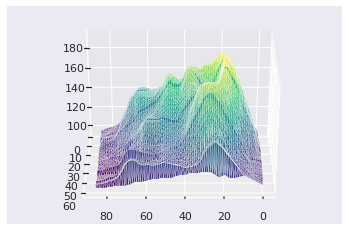

In [60]:

 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df = data.unstack().reset_index()
df.columns = ["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes
 
for angle in range(90, 200, 10):
    print(angle)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
    # Set the angle of the camera
    ax.view_init(30, angle)
 
    # Save it
    filename = 'animations/test'+str(angle)+'.png'
    plt.savefig(filename, dpi=128)
    plt.gca()
    
    plt.show()